**(1) : FILE UPLOADING**

In [5]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
csv_name = list(uploaded.keys())[0]
df = pd.read_csv(csv_name)
df.head()



Saving accident_prediction_india.csv to accident_prediction_india (2).csv


,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


**(2) : ANALYZATION CODE**

Shape: (3000, 22)
Columns: ['State Name', 'City Name', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Accident Severity', 'Number of Vehicles Involved', 'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities', 'Weather Conditions', 'Road Type', 'Road Condition', 'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)', 'Driver Age', 'Driver Gender', 'Driver License Status', 'Alcohol Involvement', 'Accident Location Details']

Missing values:
 State Name                       0
City Name                        0
Year                             0
Month                            0
Day of Week                      0
Time of Day                      0
Accident Severity                0
Number of Vehicles Involved      0
Vehicle Type Involved            0
Number of Casualties             0
Number of Fatalities             0
Weather Conditions               0
Road Type                        0
Road Condition                   0
Lighting Conditions            

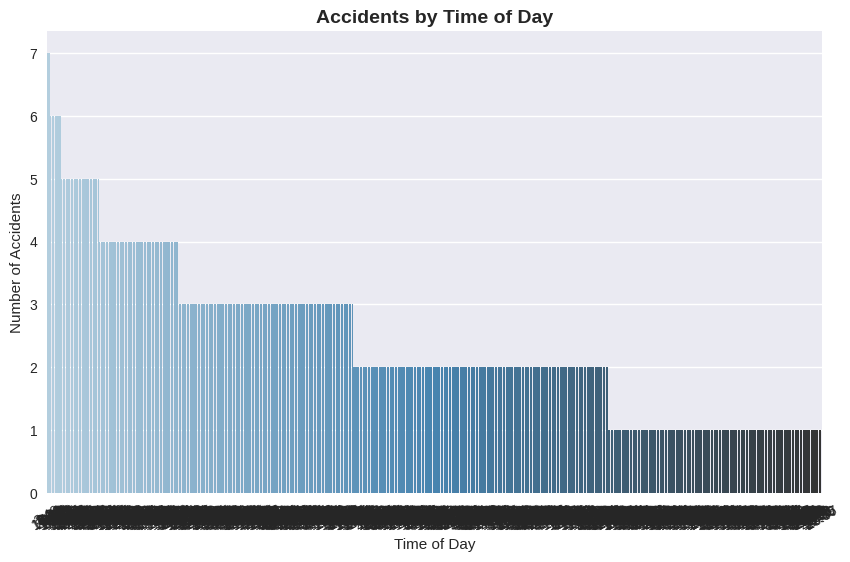

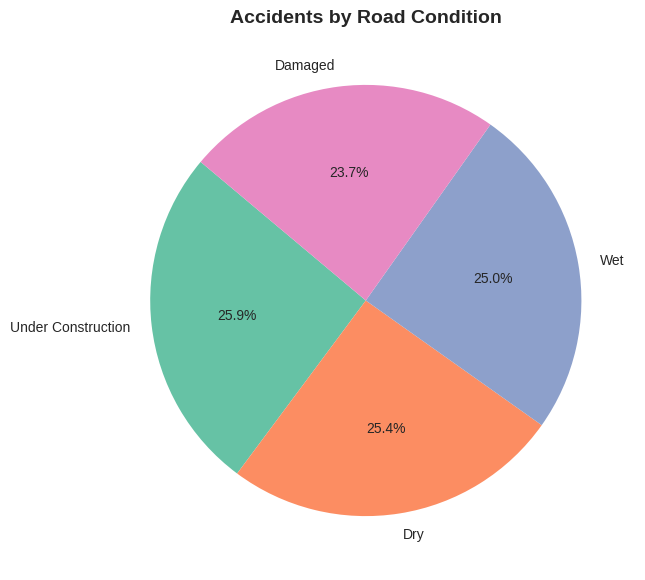

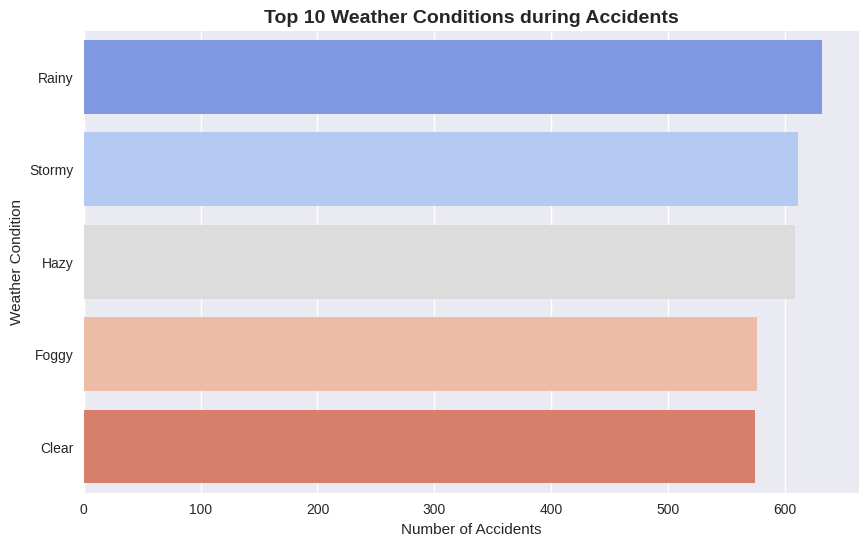

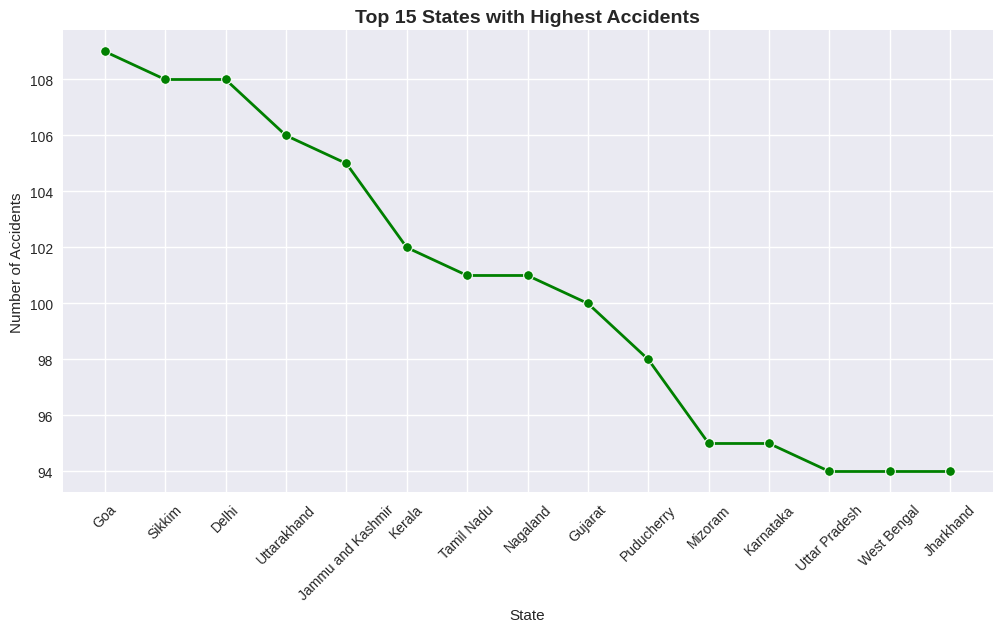

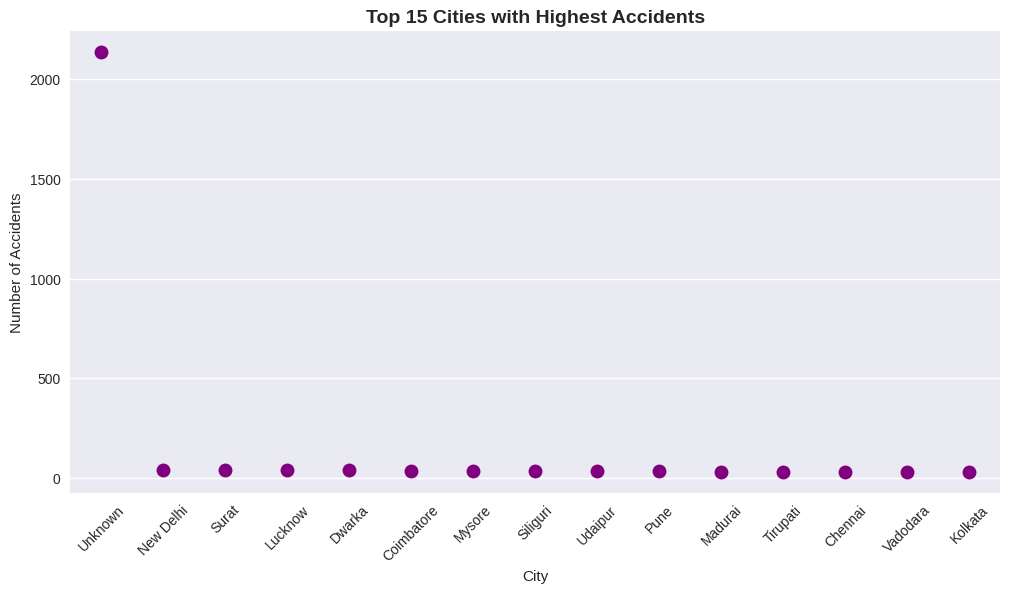


Weather × Severity:
 Accident Severity   Fatal  Minor  Serious
Weather Conditions                       
Clear                 190    202      182
Foggy                 195    174      207
Hazy                  200    203      205
Rainy                 197    224      210
Stormy                203    231      177

Top 10 States by Fatalities:
 State Name
Nagaland             276
Goa                  273
Delhi                268
Jammu and Kashmir    267
Kerala               261
Sikkim               255
West Bengal          253
Tamil Nadu           252
Telangana            238
Haryana              237
Name: Number of Fatalities, dtype: int64

--- Key Insights ---
1. Most accidents happen during: 3:40
2. Road condition with highest accidents: Under Construction
3. Weather linked with most accidents: Rainy
4. State with most accidents: Goa
5. City with most accidents: Unknown
6. Highest fatalities recorded in: Nagaland


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset load
df = pd.read_csv("accident_prediction_india.csv")

plt.style.use("seaborn-v0_8")

# dataset basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# basic stats
print("\nAccident Statistics:\n",
      df[['Number of Vehicles Involved','Number of Casualties','Number of Fatalities']].describe())

print("\nAccident Severity %:\n", df['Accident Severity'].value_counts(normalize=True)*100)
print("\nAlcohol Involvement %:\n", df['Alcohol Involvement'].value_counts(normalize=True)*100)
print("\nDriver License Status %:\n", df['Driver License Status'].value_counts(normalize=True)*100)

# accidents by time of day - barplot (fixed)
time_counts = df['Time of Day'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=time_counts.index, y=time_counts.values,
            hue=time_counts.index, palette="Blues_d", dodge=False, legend=False)
plt.title("Accidents by Time of Day", fontsize=14, fontweight="bold")
plt.xlabel("Time of Day"); plt.ylabel("Number of Accidents"); plt.xticks(rotation=30)
plt.show()

# accidents by road condition - pie chart
road_counts = df['Road Condition'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(road_counts.values, labels=road_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Accidents by Road Condition", fontsize=14, fontweight="bold")
plt.show()

# accidents by weather conditions - horizontal barplot (fixed)
weather_counts = df['Weather Conditions'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=weather_counts.index, x=weather_counts.values,
            hue=weather_counts.index, palette="coolwarm", dodge=False, legend=False)
plt.title("Top 10 Weather Conditions during Accidents", fontsize=14, fontweight="bold")
plt.xlabel("Number of Accidents"); plt.ylabel("Weather Condition")
plt.show()

# top states with accidents - line plot
state_counts = df['State Name'].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.lineplot(x=state_counts.index, y=state_counts.values, marker="o", linewidth=2, color="green")
plt.title("Top 15 States with Highest Accidents", fontsize=14, fontweight="bold")
plt.xlabel("State"); plt.ylabel("Number of Accidents"); plt.xticks(rotation=45)
plt.show()

# top cities with accidents - strip plot
city_counts = df['City Name'].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.stripplot(x=city_counts.index, y=city_counts.values, size=10, color="purple")
plt.title("Top 15 Cities with Highest Accidents", fontsize=14, fontweight="bold")
plt.xlabel("City"); plt.ylabel("Number of Accidents"); plt.xticks(rotation=45)
plt.show()

# cross analysis
cross_weather = pd.crosstab(df['Weather Conditions'], df['Accident Severity'])
print("\nWeather × Severity:\n", cross_weather.head(10))

cross_state = df.groupby('State Name')['Number of Fatalities'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 States by Fatalities:\n", cross_state)

# insights
print("\n--- Key Insights ---")
print("1. Most accidents happen during:", df['Time of Day'].value_counts().idxmax())
print("2. Road condition with highest accidents:", df['Road Condition'].value_counts().idxmax())
print("3. Weather linked with most accidents:", df['Weather Conditions'].value_counts().idxmax())
print("4. State with most accidents:", df['State Name'].value_counts().idxmax())
print("5. City with most accidents:", df['City Name'].value_counts().idxmax())
print("6. Highest fatalities recorded in:", cross_state.idxmax())


**(3) : HEATMAP CODE**

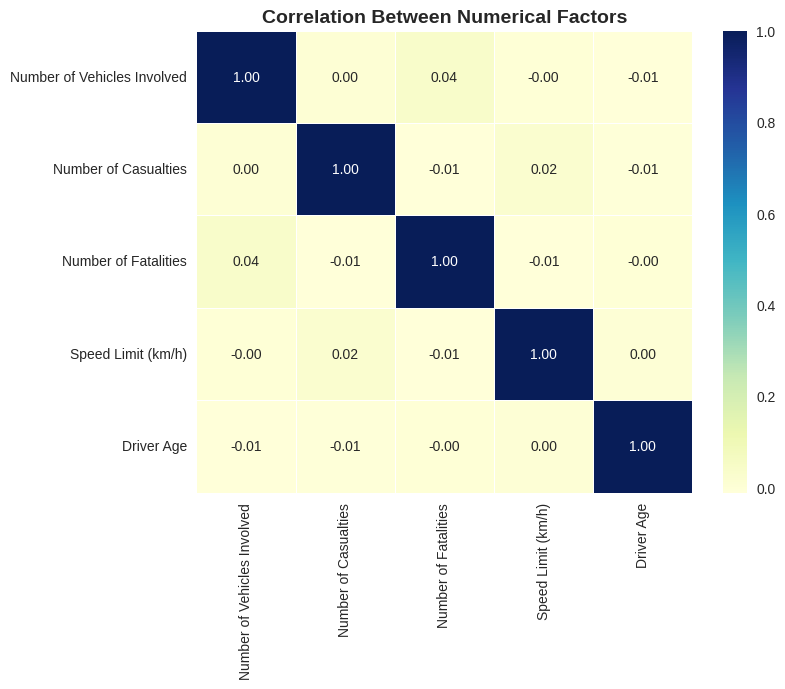

In [13]:
import numpy as np

# select numerical columns
num_cols = ['Number of Vehicles Involved','Number of Casualties','Number of Fatalities','Speed Limit (km/h)','Driver Age']

# correlation matrix
corr = df[num_cols].corr()

# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")
plt.title("Correlation Between Numerical Factors", fontsize=14, fontweight="bold")
plt.show()
